## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
mouse_metadata.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [4]:
# Checking the number of mice.
number_of_mice = mouse_metadata["Mouse ID"].nunique()
number_of_mice

249

In [5]:
number_of_mice_df = pd.DataFrame([number_of_mice], columns =["Number of Mice"])
number_of_mice_df

,Number of Mice
0,249


In [6]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [7]:
study_results.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [9]:
# Optional: Get all the data for the duplicate mouse ID. 



In [10]:
number_of_mice = study_results["Mouse ID"].nunique()
number_of_mice

249

In [11]:
number_of_mice_df = pd.DataFrame([number_of_mice], columns = ["Number of Mice"])
number_of_mice_df 

,Number of Mice
0,249


In [12]:
# Retrive Mouse ID
mouse_id = study_results.loc[:,["Mouse ID"]]
mouse_id

,Mouse ID
0,b128
1,f932
2,g107
3,a457
4,c819
...,...
1888,r944
1889,u364
1890,p438
1891,x773


In [13]:
# Retrieve Mouse ID drop duplicate
mouse_id = study_results.drop_duplicates()
mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [14]:
# Combining mouse_metadata and study_results into one dataframe
combined_dataframe = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
combined_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_dataframe.drop_duplicates()

## not working

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Checking the number of mice in the clean DataFrame.
combined_dataframe

## not working 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_dataframe = combined_dataframe.groupby("Drug Regimen")
summary_dataframe

In [18]:
# mean of the tumor volume.
mean_of_tumor = summary_dataframe["Tumor Volume (mm3)"].mean()
mean_of_tumor

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# median of the tumor volume.
median_of_tumor = summary_dataframe["Tumor Volume (mm3)"].median()
median_of_tumor

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [20]:
# variance of the tumor volume.
variance_of_tumor = summary_dataframe["Tumor Volume (mm3)"].var
variance_of_tumor

<bound method GroupBy.var of <pandas.core.groupby.generic.SeriesGroupBy object at 0x0000024D565EA320>>

In [21]:
# standard deviation of the tumor volume.
std_of_tumor = summary_dataframe["Tumor Volume (mm3)"].std()
std_of_tumor

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [22]:
# SEM of the tumor volume.
sem_of_tumor = summary_dataframe["Tumor Volume (mm3)"].sem()
sem_of_tumor

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [23]:
# Assemble the resulting series into a single summary dataframe.
summary_grouped_dataframe = pd.DataFrame({"Mean": mean_of_tumor,
                                         "Median": median_of_tumor, 
                                        # "Variance": variance_of_tumor, 
                                         "Standard Deviation": std_of_tumor, 
                                         "SEM": sem_of_tumor})

summary_grouped_dataframe.head()

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

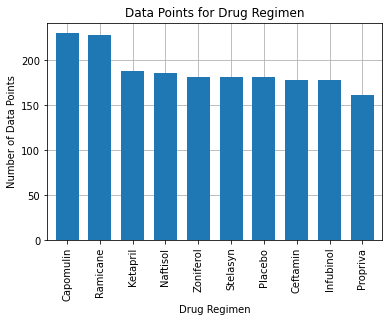

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bar_plot = combined_dataframe["Drug Regimen"].value_counts().plot.bar(width=0.7, zorder=3)

# X Axis 
bar_plot.set_xlabel("Drug Regimen")

# Y Axis 
bar_plot.set_ylabel("Number of Data Points")

# Title
bar_plot.set_title("Data Points for Drug Regimen")

# Grid 
bar_plot.grid(zorder=0)

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Gender breakdown of mice 

gender_data = combined_dataframe["Sex"].value_counts()
gender_data

Male      958
Female    935
Name: Sex, dtype: int64

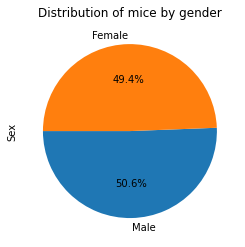

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_plot = gender_data.plot.pie(autopct="%1.1f%%", startangle=180, title="Distribution of mice by gender")


In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_data = combined_dataframe["Sex"].value_counts()
gender_data

Male      958
Female    935
Name: Sex, dtype: int64

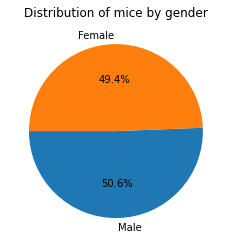

In [48]:
plt.pie(gender_data, labels=gender_data.index.values, autopct="%1.1f%%", startangle=180)
plt.title("Distribution of mice by gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [59]:
# Start by getting the last (greatest) timepoint for each mouse

greatest_time_point = pd.DataFrame(combined_dataframe.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={"Timepoint": "Greatest Timepoint"})
greatest_time_point


,Mouse ID,Greatest Timepoint
0,t573,0
1,u153,0
2,d133,0
3,n482,0
4,o848,0
...,...,...
244,k894,45
245,l471,45
246,l509,45
247,i177,45


In [63]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_greatest_time_point_original = pd.merge(combined_dataframe, greatest_time_point, on="Mouse ID")
merge_greatest_time_point_original

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [68]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftami"]


In [ ]:
# Create empty list to fill with tumor vol data (for plotting)
drug_regimen = []

In [73]:
Capomulin_dataframe = combined_dataframe.loc[combined_dataframe["Drug Regimen"] == "Capomulin",:]
Ramicane_dataframe = combined_dataframe.loc[combined_dataframe["Drug Regimen"] == "Ramicane",:]
Infubinol_dataframe = combined_dataframe.loc[combined_dataframe["Drug Regimen"] == "Infubinol",:]
Ceftami_dataframe = combined_dataframe.loc[combined_dataframe["Drug Regimen"] == "Ceftami",:]


In [76]:
# Capomulin
Capomulin_last = Capomulin_dataframe.groupby("Mouse ID").max()["Timepoint"]
Capomulin_volumn = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_volumn, combined_dataframe, on=("Mouse ID", "Timepoint"), how="left")
Capomulin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [103]:
# Calculate the Capomulin IQR and quantitatively determine if there are any potential outliers
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = Capomulin_tumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The IQR of Capomulin tumors: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} might be outliers ")
print(f"Values above {upper_bound} might be outliers ")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The IQR of Capomulin tumors: 7.781863460000004
Values below 20.70456164999999 might be outliers 
Values above 51.83201549 might be outliers 


In [104]:
# Ramicane
Ramicane_last = Ramicane_dataframe.groupby("Mouse ID").max()["Timepoint"]
Ramicane_volumn = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_volumn, combined_dataframe, on=("Mouse ID", "Timepoint"), how="left")
Ramicane_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [ ]:
# Calculate the Ramicane IQR and quantitatively determine if there are any potential outliers

In [ ]:
# Calculate the Infubinol IQR and quantitatively determine if there are any potential outliers

In [ ]:
# Calculate the Ceftami IQR and quantitatively determine if there are any potential outliers

In [ ]:
# Locate the rows which contain mice on each drug and get the tumor volumes

In [ ]:
# add subset 

In [ ]:
# Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
